# Lab 4 - Spatial Analysis in Python, Part 1

## Lily Cao

### Pandas Tutorial Exercises (2)

In [1]:
import pandas 
import numpy as np 
data = pandas.read_csv('GIS 3/CAINC1__ALL_STATES_1969_2017.csv', encoding='latin-1', 
                      skipfooter=3, engine='python')
pandas.set_option('display.max_columns', 500)
data1 = data.replace("(NA)", 0)
data1['1969'] = data1['1969'].astype(int)

small = data[data.LineCode.isin( [2, 3] )]
for year in range(1969, 2018):
    small = small[small[str(year)] != "(NA)"]
    
convert_dict = dict([(str(year), int) for year in range (1969, 2018)])
small = small.astype(convert_dict)

geofips = pandas.unique(small.GeoFIPS)
small['GeoFIPS'] = [fips.replace("\"", "").strip() for fips in small.GeoFIPS]
geofips = pandas.unique(small.GeoFIPS)

pc_inc = small[small.LineCode==3]

*Identify the area with the lowest per-capita income each year*

In [9]:
area_lst = []
lowest_lst = []
year_lst = []

for i in range(8,57):
    year = pc_inc.iloc[:, [i]]
    year_lst.append(year.columns[0])
    
    lowest = year.min()
    lowest_lst.append(lowest[0])
    
    area = pc_inc.loc[pc_inc[pc_inc.iloc[:, [i]].columns].idxmin()].GeoName.to_string()
    area_lst.append(area)
    
df = pandas.DataFrame({'Area': area_lst, 'Income': lowest_lst, 'Year': year_lst})
df

,Area,Income,Year
0,"8225 Loving, TX",1166,1969
1,"8414 Starr, TX",1381,1970
2,"7964 Dimmit, TX",1497,1971
3,"8534 Zavala, TX",1702,1972
4,"7964 Dimmit, TX",1971,1973
5,"8414 Starr, TX",2067,1974
6,"8414 Starr, TX",2215,1975
7,"8414 Starr, TX",2326,1976
8,"8414 Starr, TX",2355,1977
9,"8414 Starr, TX",2654,1978


*As a percentage of the minimum per-captia income, calculate the relative income gap between the extremes of the income distribution each year. Identify the year with the maximum relative income gap.*

In [8]:
ratio_lst = []

for i in range(8,57):
    
    year = pc_inc.iloc[:, [i]]
    lowest = year.min()   
    highest = year.max()
    
    ratio = highest[0]/lowest[0]
    ratio_lst.append(ratio)
    
df2 = pandas.DataFrame({'Year': year_lst, 'Ratio': ratio_lst})
df2

,Year,Ratio
0,1969,6.724700
1,1970,6.891383
2,1971,6.822979
3,1972,6.873678
4,1973,6.931507
5,1974,6.795356
6,1975,9.129120
7,1976,8.221840
8,1977,7.513376
9,1978,7.672946


In [4]:
print("Maximum relative gap: {} occurred in {}".format(df2.loc[df2['Ratio'].idxmax()][1], df2.loc[df2['Ratio'].idxmax()][0]))

Maximum relative gap: 19.591187065426823 occurred in 2017


## New graphic using something learned in the "Visualizations" tutorial

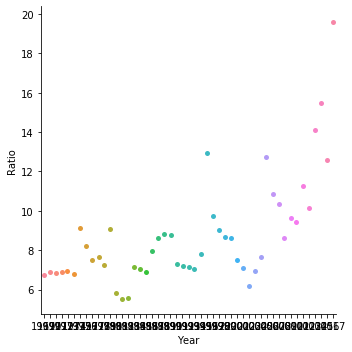

In [7]:
import seaborn
seaborn.catplot(x='Year',
                y='Ratio',
                data=df2)

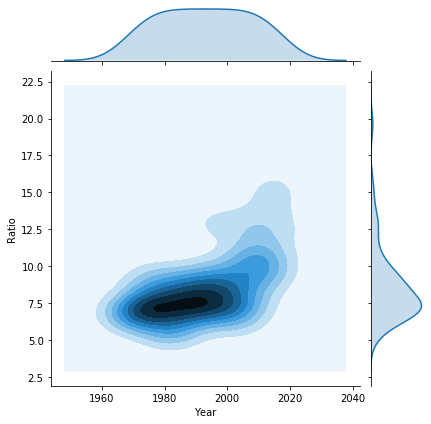

In [6]:
seaborn.jointplot('Year', 
                  'Ratio', 
                  df2, 
                  kind='kde')

## How is data stored in R versus pandas/Python?

pandas store (a table of) data in a DataFrame, a 2D data structure that can store various types of data like characters, integers, categorical data and more in its columns. Each column in a DataFrame is a Series, which is a 1D numpy ndarray with row labels but no column labels. Internally, pandas also groups the columns into blocks of values of the same data type (i.e. IntBlock stores data of type integer). The blocks are numpy arrays with a slice object that defines which of the DataFrame's colums are stored in it. 

R stores data tables in a data frame through the data.frame() function. It is a special case of lists; specifically, it's a list of equal-length vectors. Like a DataFrame in pandas, it can store different classes of data in its columns. Unlike a DataFrame in Python, it is a built-in construct and doesn't have to be imported like it does through pands in Python.

## How is spatial data stored in sf/R versus geopandas/Python?


In R, the sf package represents simple features as native R objects. The attributes are stored in data frames, with the geographic data stored in its own (list-)column, usually named "geom" or "geometry." Since geometries aren't single-valued, they're put in a list-column. More specifically, sf is the data frame with feature attributes and geometries. It contains sfc, the list-column, which is composed of sfg, the geometry of each simple feature. 

GeoPandas stores spatial data in GeoDataFrames, which extends the functionalities of DataFrame from pandas and contains GeoSeries. Geometries are stored in a "geometry" column (which is a GeoSeries) and stored as Shapely (a Python package) objects. There can be multiple columns with Shapely objects but only column can be the "active" geometry at a time.

## Identify 3 more differences you uncovered in syntax logic or computational processing

|Function| R | Python| 
|------|------|------|
|Group By| group_by(df, col1)  | df.groupby('col1')|
|Sorting | arrange(df, desc(col1)) |df.sort_values('col1', ascending=False)|
|Filtering| filter(df, col1 == 1, col2 = 2) | df.query('col1 == 1 & col2 == 2')|
|Summarizing| summary(df) | df.describe()|
|Selecting Matched Data| x %in% c(1,2) | match(x, c(1,2))|

In general:
- R is more functional while Python is more object-oriented
- R has more built-in data analysis (i.e. summary) while Python relies on packages (i.e. have to import pandas for descrbe())